# SVM 支持向量机

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

生成二维线性可分数据

In [2]:
X, y = make_blobs(n_samples=50, centers=2, random_state=6, cluster_std=1.2)

拟合SVM模型 (线性核)

In [4]:
clf = SVC(kernel="linear", C=1)
clf.fit(X, y)

SVC(C=1, kernel='linear')

可视化决策边界 + 支持向量

In [8]:
def plot_svm(clf, X, y):
    plt.figure(figsize=(6, 4))

    # 画样本点
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)

    # 画支持向量
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=150, facecolors='none', edgecolors='k', linewidth=1.5, label='Support Vectors')

    # 决策边界
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # 画决策边界和间隔边界
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               linestyles=['--', '-', '--'])
    plt.legend()
    plt.title("SVM Decision Boundary and Support Vectors")
    plt.show()

展示图像

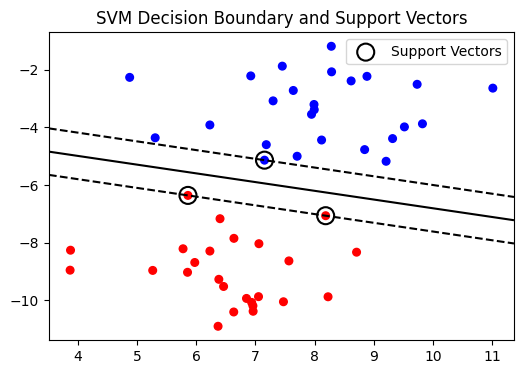

In [9]:
plot_svm(clf, X, y)

黑色实线：分类边界

黑色虚线：间隔边界（支持向量所在的位置）

被圈起来的点：支持向量